In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np

#load and Train the data set
df = pd.read_csv('/bpp_training_data (1).csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   300000 non-null  int64  
 1   SalePrice                 300000 non-null  float64
 2   MachineID                 300000 non-null  int64  
 3   ModelID                   300000 non-null  int64  
 4   datasource                300000 non-null  int64  
 5   auctioneerID              300000 non-null  int64  
 6   YearMade                  300000 non-null  int64  
 7   MachineHoursCurrentMeter  300000 non-null  int64  
 8   UsageBand                 300000 non-null  int64  
 9   fiModelDesc               300000 non-null  int64  
 10  fiBaseModel               300000 non-null  int64  
 11  fiSecondaryDesc           300000 non-null  int64  
 12  fiModelSeries             300000 non-null  int64  
 13  fiModelDescriptor         300000 non-null  i

In [10]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,17,1974,17,0,4593,...,0,1,8,6,0,0,1989,1,17,17
1,1821514,14000.0,1194089,10150,132,31,1980,31,0,1820,...,0,0,0,0,4,2,1989,1,31,31
2,1505138,50000.0,1473654,4139,132,31,1978,31,0,2348,...,0,1,8,6,0,0,1989,1,31,31
3,1671174,16000.0,1327630,8591,132,31,1980,31,0,1819,...,0,0,0,0,4,2,1989,1,31,31
4,1329056,22000.0,1336053,4089,132,31,1984,31,0,2119,...,0,1,6,5,0,0,1989,1,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2192279,16500.0,1701366,6272,136,78,1000,78,0,4215,...,0,0,0,0,0,0,2009,3,19,78
299996,2192338,17000.0,1787662,12919,136,78,1000,78,0,4216,...,0,0,0,0,0,0,2009,3,19,78
299997,2433168,11500.0,1714162,9580,136,78,2005,78,0,4514,...,0,0,0,0,0,0,2009,3,19,78
299998,1586638,32000.0,1386512,11398,132,78,2005,78,3,1202,...,0,1,6,6,0,0,2009,3,19,78


In [11]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfYear
count,3.000000e+05,300000.000000,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,1.658908e+06,30991.339990,1.186822e+06,6314.940467,132.379740,177.264650,1905.678890,177.264650,0.193833,1660.867117,...,0.316240,0.203283,1.328937,1.188987,0.693120,0.349573,2002.096633,6.321257,15.911637,177.264650
std,3.741182e+05,22836.063512,3.901941e+05,5531.594504,3.604955,105.040516,279.335539,105.040516,0.674342,1223.306905,...,0.664279,0.402591,2.691112,2.359794,1.511277,0.760303,5.309808,3.471672,8.404835,105.040516
min,1.139246e+06,4750.000000,0.000000e+00,43.000000,121.000000,2.000000,1000.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1989.000000,1.000000,1.000000,2.000000
25%,1.400851e+06,14500.000000,1.103634e+06,3243.000000,132.000000,80.000000,1983.000000,80.000000,0.000000,729.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.000000,3.000000,9.000000,80.000000
50%,1.599702e+06,24000.000000,1.271196e+06,4603.000000,132.000000,165.000000,1993.000000,165.000000,0.000000,1424.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2003.000000,6.000000,16.000000,165.000000
75%,1.781636e+06,40000.000000,1.435632e+06,7524.000000,132.000000,271.000000,1998.000000,271.000000,0.000000,2302.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,9.000000,23.000000,271.000000
max,4.512524e+06,142000.000000,2.386425e+06,37198.000000,172.000000,365.000000,2009.000000,365.000000,3.000000,5055.000000,...,3.000000,2.000000,10.000000,7.000000,4.000000,5.000000,2009.000000,12.000000,31.000000,365.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

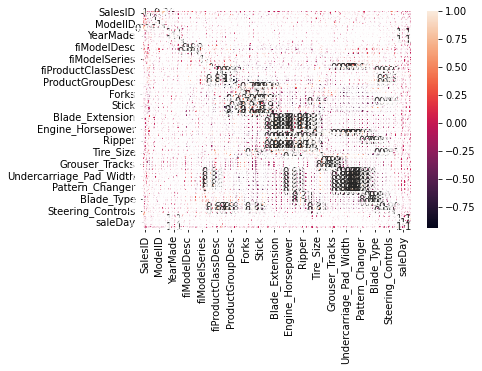

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
X=df.drop(['SalePrice'],axis=1)
Y=df[["SalePrice"]]

In [15]:
#X.shape

In [16]:
#Y.shape

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10,random_state=11)

In [18]:
X_train.shape

(270000, 55)

In [19]:
Y_train.shape

(270000, 1)

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)

In [21]:
X_test_scaled=ss.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression

lin_model=LinearRegression().fit(X_train_scaled,Y_train)

In [23]:
lin_model.intercept_

array([30976.66995926])

In [24]:
lin_model.coef_

array([[-1.16187077e+02, -2.86237811e+03,  2.02980228e+02,
         2.06969491e+02, -3.49583989e+14,  3.01423985e+03,
         7.26788223e+14,  1.61516190e+03, -5.07280358e+03,
         4.67875946e+03,  3.76070885e+03,  1.80758660e+03,
         3.39065548e+03,  2.70823158e+03, -2.84641763e+02,
        -2.73409521e+02,  6.88009611e+14, -6.88009611e+14,
        -3.09826916e+03, -6.47405547e+02,  1.05584732e+03,
         7.39967292e+01,  1.02390652e+04, -8.16185555e+02,
         5.17668437e+03, -3.19146472e+02,  2.09148428e+03,
         9.64097553e+02, -1.15382121e+04,  7.39194836e+03,
         1.51451756e+03,  5.72470450e+03,  1.81090348e+03,
         2.44621875e+03,  6.79046875e+02, -5.70679688e+02,
        -4.60693750e+03, -1.09437500e+03,  1.05250000e+02,
         1.67756250e+03,  1.43188750e+04, -5.19062500e+01,
        -8.21537500e+03, -3.40550000e+03,  2.47709375e+03,
         2.17953125e+02,  8.12225000e+03,  4.06978125e+03,
        -1.75844062e+04, -2.01368750e+03, -4.97017969e+0

In [25]:
Y_pred=lin_model.predict(X_test_scaled)

In [31]:
Y_pred

array([[25078.66995926],
       [40663.73245926],
       [34890.73245926],
       ...,
       [ 7102.29495926],
       [38826.91995926],
       [25568.51370926]])

In [27]:
result=pd.DataFrame()

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test.values, Y_pred)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test.values, Y_pred)

print(mean_absolute_error(Y_test.values,Y_pred)*270000)


3367629172.3973336


In [29]:
from sklearn.metrics import r2_score
r2_score(Y_test.values, Y_pred)

0.4228964660164968